https://jarroba.com/python-mongodb-driver-pymongo-con-ejemplos/ 

In [1]:
#pip install pymongo


In [2]:
from pymongo import MongoClient


In [3]:
class Futbolista:

    def __init__(self, nombre: str, apellidos: str, edad: int, internacional: bool):
        self.nombre = nombre
        self.apellidos = apellidos
        self.edad = edad
        self.internacional = internacional

    def toDBCollection(self):
        return {
            "nombre": self.nombre,
            "apellidos": self.apellidos,
            "edad": self.edad,
            "internacional": self.internacional
        }

    def __str__(self):
        return f"Nombre: {self.nombre} - Apellidos: {self.apellidos} - Edad: {self.edad} - Internacional: {self.internacional}"


In [4]:
# Creo una lista de objetos futbolista a insertar en la BD
futbolistas = [
    Futbolista('Iker','Casillas',33, True),
    Futbolista('Carles','Puyol',36,False),
    Futbolista('Sergio','Ramos',28,True),
    Futbolista('Andrés','Iniesta',30,True),
    Futbolista('Fernando','Torres',30,True),
    Futbolista('Leo','Baptistao',22,False),
    Futbolista('Juan','Baptistao',22,False),
    Futbolista('diego','Baptistao',22,False),
    Futbolista('camilo','Baptistao',22,False),
    Futbolista('Espin','Baptistao',22,False),
    Futbolista('Diego','Baptistao',22,False),
]




In [5]:
# PASO 1: Conexión al Server de MongoDB Pasandole el host y el puerto

client = MongoClient("mongodb+srv://ValRudas:<MINIONS2005.>@mryoongi.pbuzqpp.mongodb.net/prueba")
#db = client.test

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

db = client.Futbol

collection = db.Futbolistas


bad auth : authentication failed, full error: {'ok': 0, 'errmsg': 'bad auth : authentication failed', 'code': 8000, 'codeName': 'AtlasError'}


In [6]:
# PASO 4.1: "CREATE" -> Metemos los objetos futbolista (o documentos en Mongo) en la coleccion Futbolista
futbolistas_insertados = []
for futbolista in futbolistas:
    resultado = collection.insert_one(futbolista.toDBCollection())
    futbolistas_insertados.append(resultado.inserted_id)
#print("Futbolistas insertados: ", futbolistas_insertados)
print("Futbolistas insertados: ", futbolistas_insertados)


Futbolistas insertados:  [ObjectId('643f5aa7a25946234c8eefd0'), ObjectId('643f5aa7a25946234c8eefd1'), ObjectId('643f5aa7a25946234c8eefd2'), ObjectId('643f5aa8a25946234c8eefd3'), ObjectId('643f5aa8a25946234c8eefd4'), ObjectId('643f5aa8a25946234c8eefd5'), ObjectId('643f5aa9a25946234c8eefd6'), ObjectId('643f5aa9a25946234c8eefd7'), ObjectId('643f5aa9a25946234c8eefd8'), ObjectId('643f5aaaa25946234c8eefd9'), ObjectId('643f5aaaa25946234c8eefda')]


In [7]:
# Actualizar 
resultado  = collection.update_one({"nombre":"Andrés"}, {"$set": {"nombre":"Andrés Juan"}})

print("Documento actualizado: ", resultado.modified_count)

# Futbolista('Sergio','Ramos',28,True),
#    Futbolista('Andrés','Iniesta',30,True),



#Eliminar

Documento actualizado:  1


In [8]:
resultado = collection.find()

for fut in resultado:
    print(fut)

{'_id': ObjectId('643d7af4212a0ef1d288eb96'), 'nombre': 'Carles', 'apellidos': 'Puyol', 'edad': 65, 'internacional': 1}
{'_id': ObjectId('643d7af4212a0ef1d288eb97'), 'nombre': 'Sergio', 'apellidos': 'Ramos', 'edad': 28, 'internacional': True}
{'_id': ObjectId('643d7af5212a0ef1d288eb98'), 'nombre': 'Andrés Juan', 'apellidos': 'Iniesta', 'edad': 30, 'internacional': True}
{'_id': ObjectId('643d7af5212a0ef1d288eb99'), 'nombre': 'Fernando', 'apellidos': 'Torres', 'edad': 30, 'internacional': True}
{'_id': ObjectId('643d8064b11171eb7c19d0a9'), 'nombre': 'Carles', 'apellidos': 'Puyol', 'edad': 36, 'internacional': 1}
{'_id': ObjectId('643d8065b11171eb7c19d0aa'), 'nombre': 'Sergio', 'apellidos': 'Ramos', 'edad': 28, 'internacional': True}
{'_id': ObjectId('643d8065b11171eb7c19d0ab'), 'nombre': 'Andrés Juan', 'apellidos': 'Iniesta', 'edad': 30, 'internacional': True}
{'_id': ObjectId('643d8065b11171eb7c19d0ac'), 'nombre': 'Fernando', 'apellidos': 'Torres', 'edad': 30, 'internacional': True}
{'

In [9]:
resultado = collection.delete_one({"nombre": "Iker"})

if resultado.deleted_count == 1:
    print("Se elimino el documento")
else:
    print("No se elimino el documento")

Se elimino el documento


In [10]:
resultado  = collection.update_many({"nombre": {"$in": ["Iker", "Carles"]}}, {"$set": {"edad": 65}})

print (f"se actualziaron {resultado.modified_count} documentos")

se actualziaron 6 documentos


In [11]:
resultado = collection.delete_many({"apellidos": {"$regex":"^B"}})


if resultado.deleted_count == 1:
    print("Se elimino el documento")
else:
    print("No se elimino el documento")


No se elimino el documento


In [12]:
print(futbolistas[0])

Nombre: Iker - Apellidos: Casillas - Edad: 33 - Internacional: True


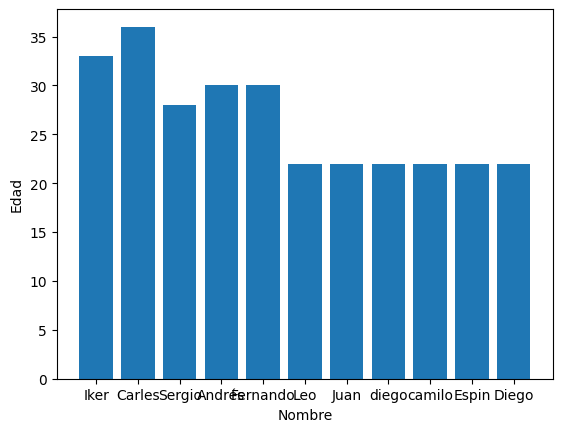

In [13]:
import matplotlib.pyplot as plt

# Lista de nombres y edades de los futbolistas
nombres = [futbolista.nombre for futbolista in futbolistas]
edades = [futbolista.edad for futbolista in futbolistas]

# Crear un gráfico de barras
plt.bar(nombres, edades)

# Agregar etiquetas a los ejes
plt.xlabel('Nombre')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

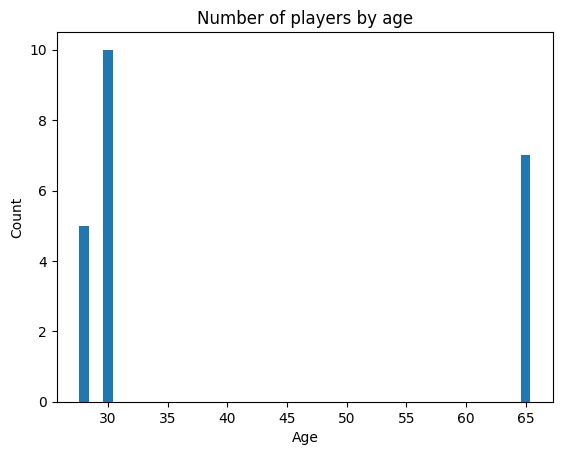

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Query the collection to get the ages of all the players
ages = collection.distinct('edad')

# Count the number of players for each age
counts = [collection.count_documents({'edad': age}) for age in ages]

# Create a bar chart using Matplotlib
plt.bar(ages, counts)
plt.title('Number of players by age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


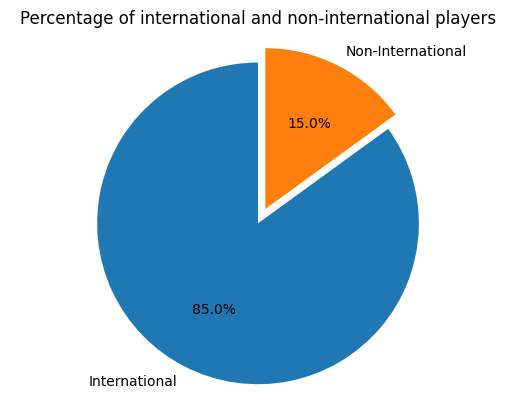

In [15]:
import matplotlib.pyplot as plt

# Count the number of international and non-international players
num_international = collection.count_documents({'internacional': True})
num_non_international = collection.count_documents({'internacional': False})

# Create a pie chart using Matplotlib
labels = ['International', 'Non-International']
sizes = [num_international, num_non_international]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Percentage of international and non-international players')
plt.show()


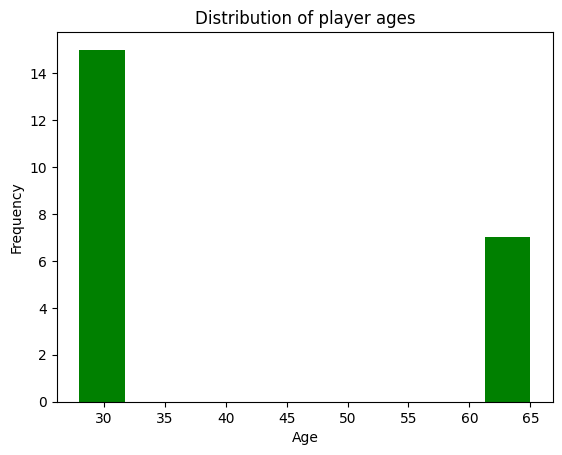

In [16]:
import matplotlib.pyplot as plt

# Get the ages of all players in the collection
ages = [futbolista["edad"] for futbolista in collection.find()]



# Create a histogram using Matplotlib
plt.hist(ages, bins=10, color='green')

plt.title('Distribution of player ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


In [18]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.8 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 21.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd

# Create a cursor to iterate over the collection
resultado = collection.find()

# Create a list to store the documents
documentos = []

# Iterate over the cursor and append the documents to the list
for document in resultado:
    documentos.append(document)

# Create a DataFrame from the list of documents
df = pd.DataFrame(documentos)

# Print the DataFrame
print(df)

                         _id       nombre apellidos  edad internacional
0   643d7af4212a0ef1d288eb96       Carles     Puyol    65             1
1   643d7af4212a0ef1d288eb97       Sergio     Ramos    28          True
2   643d7af5212a0ef1d288eb98  Andrés Juan   Iniesta    30          True
3   643d7af5212a0ef1d288eb99     Fernando    Torres    30          True
4   643d8064b11171eb7c19d0a9       Carles     Puyol    65             1
5   643d8065b11171eb7c19d0aa       Sergio     Ramos    28          True
6   643d8065b11171eb7c19d0ab  Andrés Juan   Iniesta    30          True
7   643d8065b11171eb7c19d0ac     Fernando    Torres    30          True
8   643d82fb212a0ef1d288eb9c       Carles     Puyol    65         False
9   643d82fb212a0ef1d288eb9d       Sergio     Ramos    28          True
10  643d82fc212a0ef1d288eb9e  Andrés Juan   Iniesta    30          True
11  643d82fc212a0ef1d288eb9f     Fernando    Torres    30          True
12  643d832b212a0ef1d288eba6         Iker  Casillas    65       

In [22]:
df.describe()

,edad
count,22.000000
mean,40.681818
std,17.022076
min,28.000000
25%,30.000000
50%,30.000000
75%,65.000000
max,65.000000


In [26]:
df1 = df.drop_duplicates()


In [30]:
df = df.drop_duplicates(subset=['nombre'])
df

,_id,nombre,apellidos,edad,internacional
0,643d7af4212a0ef1d288eb96,Carles,Puyol,65,1
1,643d7af4212a0ef1d288eb97,Sergio,Ramos,28,True
2,643d7af5212a0ef1d288eb98,Andrés Juan,Iniesta,30,True
3,643d7af5212a0ef1d288eb99,Fernando,Torres,30,True
12,643d832b212a0ef1d288eba6,Iker,Casillas,65,True
15,643d832c212a0ef1d288eba9,Andrés,Iniesta,30,True
